In [178]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [179]:
df=pd.read_csv('GhadZah.csv')

In [180]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,26.799999,26.950001,26.650000,26.740000,19.072382,65002900
1,2005-01-04,26.870001,27.100000,26.660000,26.840000,19.143705,109442100
2,2005-01-05,26.840000,27.100000,26.760000,26.780001,19.100908,72463500
3,2005-01-06,26.850000,27.059999,26.639999,26.750000,19.079514,76890500
4,2005-01-07,26.820000,26.889999,26.620001,26.670000,19.022453,68723300
...,...,...,...,...,...,...,...
4224,2021-10-13,294.910004,297.279999,293.489990,296.309998,296.309998,23416300
4225,2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900
4226,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
4227,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4229 non-null   object 
 1   Open       4229 non-null   float64
 2   High       4229 non-null   float64
 3   Low        4229 non-null   float64
 4   Close      4229 non-null   float64
 5   Adj Close  4229 non-null   float64
 6   Volume     4229 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 231.4+ KB


# >Data Cleaning..

In [182]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [183]:
df.duplicated().sum()#Check for Remove duplicates , 0 no duplicates.

0

In [184]:
#Remove duplicates from the original DataFrame
df.drop_duplicates(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,26.799999,26.950001,26.650000,26.740000,19.072382,65002900
1,2005-01-04,26.870001,27.100000,26.660000,26.840000,19.143705,109442100
2,2005-01-05,26.840000,27.100000,26.760000,26.780001,19.100908,72463500
3,2005-01-06,26.850000,27.059999,26.639999,26.750000,19.079514,76890500
4,2005-01-07,26.820000,26.889999,26.620001,26.670000,19.022453,68723300
...,...,...,...,...,...,...,...
4224,2021-10-13,294.910004,297.279999,293.489990,296.309998,296.309998,23416300
4225,2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900
4226,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
4227,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300


# >Describe..

In [185]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4229.000000,4229.000000,4229.000000,4229.000000,4229.000000,4.229000e+03
mean,65.345822,65.963611,64.725344,65.375266,60.342593,4.764745e+07
std,63.686275,64.285701,63.088165,63.736489,65.261639,2.929084e+07
min,15.200000,15.620000,14.870000,15.150000,11.532784,7.425600e+06
25%,27.080000,27.340000,26.900000,27.120001,20.741640,2.727980e+07
50%,33.639999,34.099998,33.310001,33.720001,27.236143,4.173910e+07
75%,72.959999,73.349998,72.480003,72.830002,68.953148,6.009170e+07
max,308.350006,309.299988,307.220001,308.230011,308.230011,5.910522e+08


# >Feature Selection..

In [186]:
df_cat=df.select_dtypes(include='object')
df_cat.head(7)

,Date
0,2005-01-03
1,2005-01-04
2,2005-01-05
3,2005-01-06
4,2005-01-07
5,2005-01-10
6,2005-01-11


<AxesSubplot:>

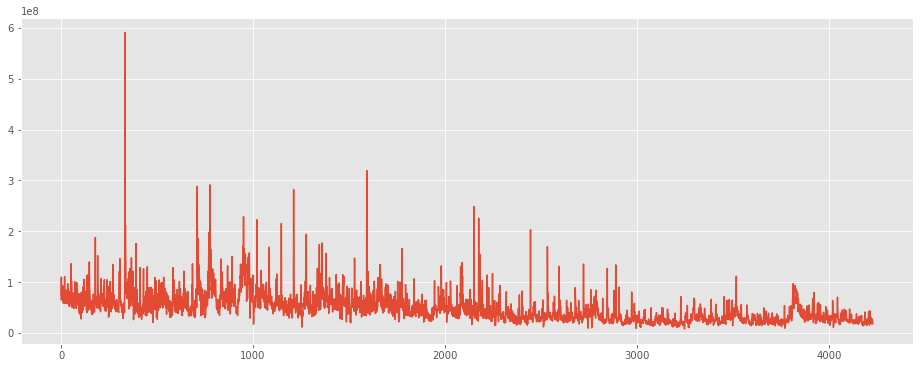

In [187]:
df['Volume'].plot(figsize=(16,6))

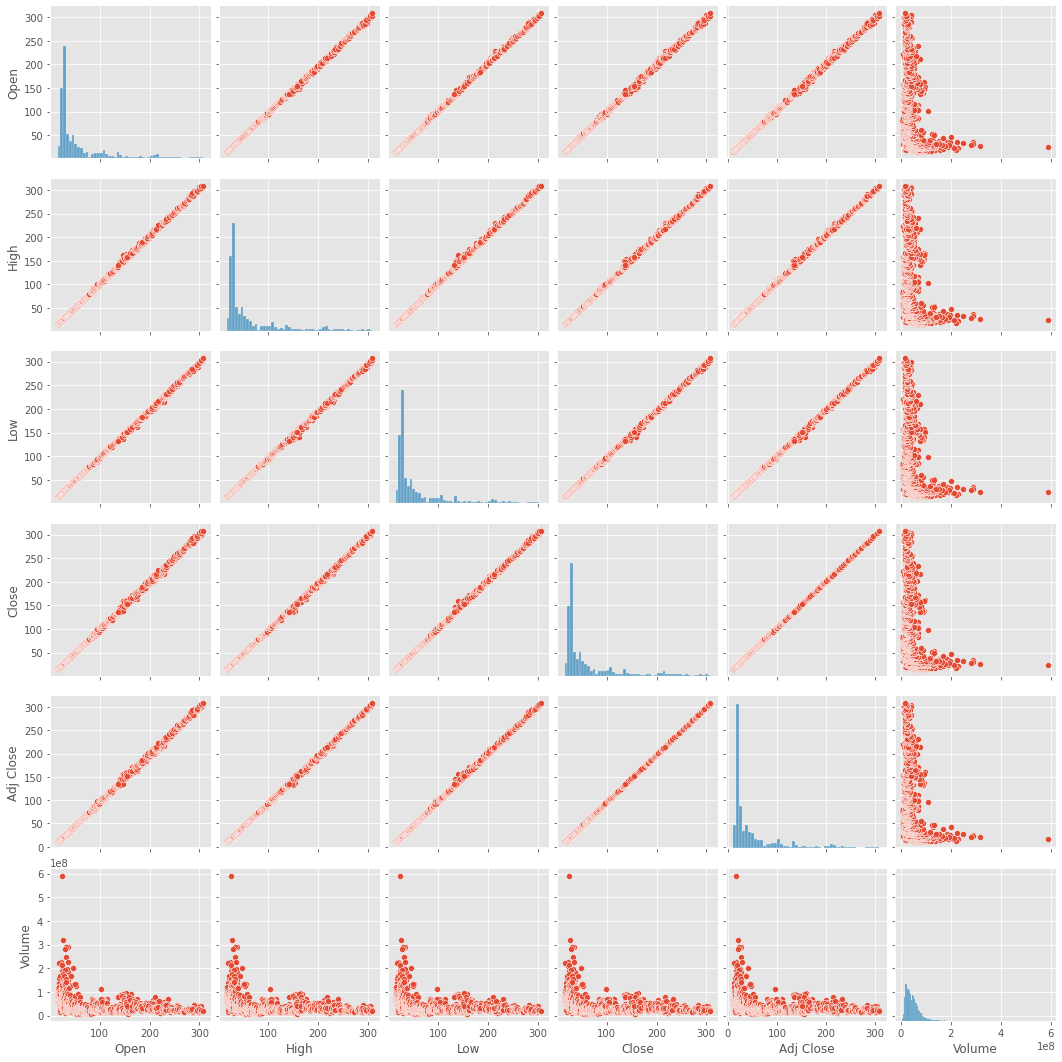

In [188]:
sns.pairplot(df)

<AxesSubplot:>

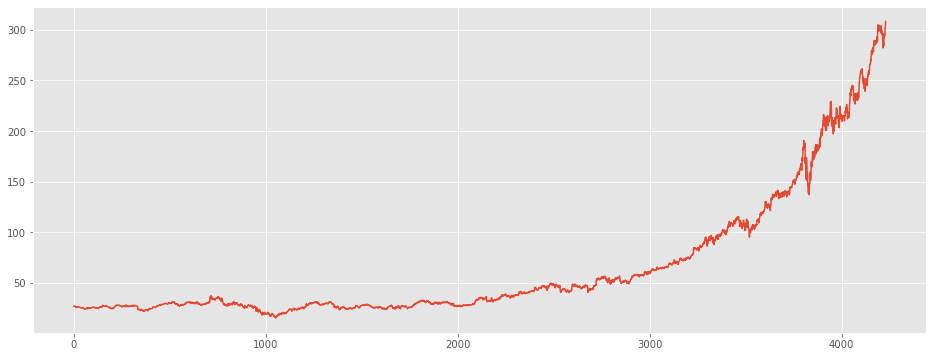

In [189]:
df['Open'].plot(figsize=(16,6))#Ploting "open" from df

In [190]:
data = pd.DataFrame(df)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,26.799999,26.950001,26.650000,26.740000,19.072382,65002900
1,2005-01-04,26.870001,27.100000,26.660000,26.840000,19.143705,109442100
2,2005-01-05,26.840000,27.100000,26.760000,26.780001,19.100908,72463500
3,2005-01-06,26.850000,27.059999,26.639999,26.750000,19.079514,76890500
4,2005-01-07,26.820000,26.889999,26.620001,26.670000,19.022453,68723300
...,...,...,...,...,...,...,...
4224,2021-10-13,294.910004,297.279999,293.489990,296.309998,296.309998,23416300
4225,2021-10-14,299.209991,303.269989,297.829987,302.750000,302.750000,27262900
4226,2021-10-15,302.339996,304.450012,300.519989,304.209991,304.209991,25374700
4227,2021-10-18,303.570007,308.209991,302.690002,307.290009,307.290009,22729300


In [191]:
sigmaxy = 0; sigmax = 0; sigmaxs= 0 #initialitation variable
tdata = len(df.Open) #total data
x = np.linspace(0,tdata-1, tdata)#time stamp as list from 0 to total of open dataset 
y = data.Open

In [192]:
# Calculation finding alpha and beta 
sigmax  = x.sum()
sigmay  = y.sum()
sigmaxy = (y*x).sum()
sigmaxs = (x**2).sum()
ymean = sigmay/tdata
xmean = sigmax/tdata
beta = (tdata*sigmaxy - sigmax*sigmay)/(tdata*sigmaxs - sigmax**2)
alpha = ymean - beta*xmean
print('parameter a', alpha)
print('parameter b', beta)

parameter a -20.78344921286289
parameter b 0.04074232305927884


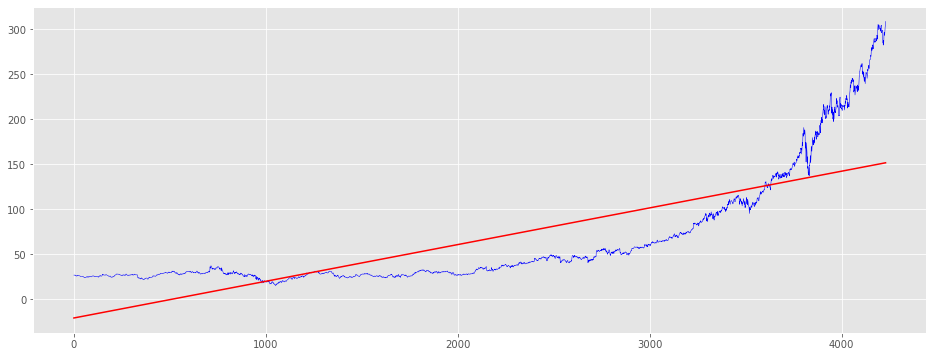

In [193]:
ypred = beta*x + alpha
plt.figure(figsize=(16, 6))
plt.plot(x,y, color='blue', linewidth = 0.5)
plt.plot(x, ypred, color='red')

# Data Preparation

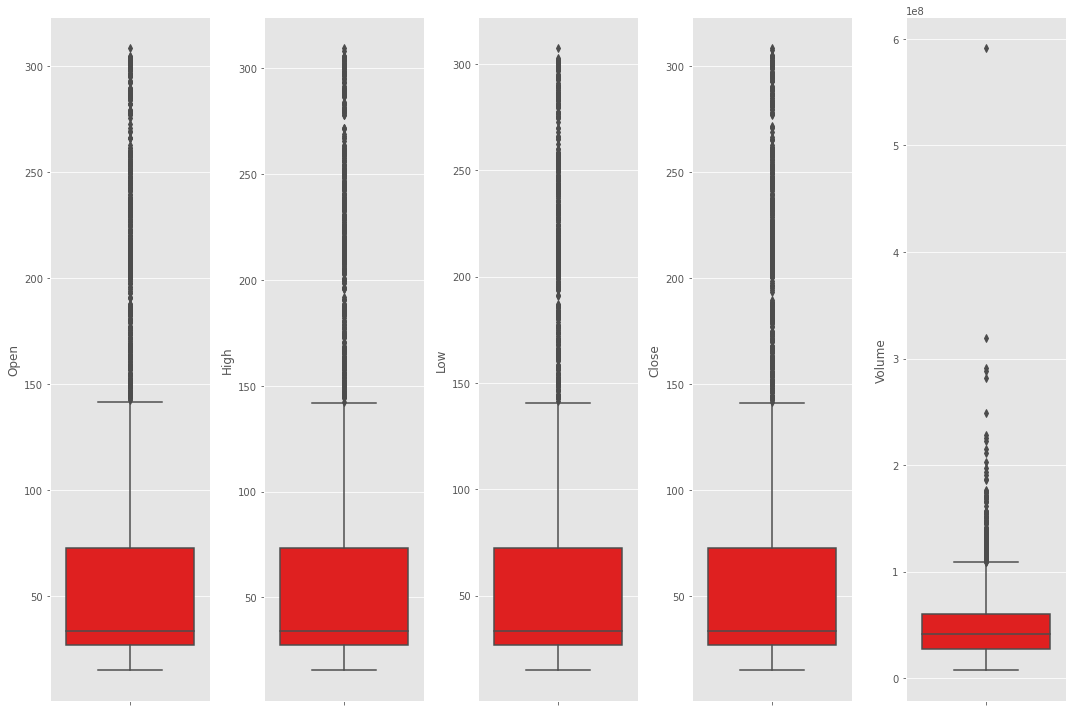

In [194]:
# Data Preparation
features = ['Open','High','Low','Close','Volume']
plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y=df[features[i]],color='red',orient='v')
    plt.tight_layout()

# ||Categorical Value Counting||


In [195]:
cats = ['Open','High','Low','Close'] 
for col in cats:
    print(f'''Value count column {col}:''')
    print(df[col].value_counts())
    print()

Value count column Open:
27.010000     9
27.930000     8
25.219999     8
27.879999     8
27.080000     8
             ..
58.650002     1
48.189999     1
237.419998    1
26.450001     1
172.210007    1
Name: Open, Length: 2881, dtype: int64

Value count column High:
26.000000     12
27.080000      9
26.100000      9
27.200001      8
30.000000      8
              ..
139.669998     1
82.800003      1
45.639999      1
98.879997      1
206.350006     1
Name: High, Length: 2853, dtype: int64

Value count column Low:
25.500000     11
27.000000     11
27.200001     10
27.760000     10
28.799999      9
              ..
307.220001     1
22.000000      1
136.449997     1
48.189999      1
206.350006     1
Name: Low, Length: 2871, dtype: int64

Value count column Close:
27.250000     10
25.809999      8
27.910000      8
28.219999      7
25.110001      7
              ..
296.989990     1
32.669998      1
182.830002     1
26.219999      1
243.029999     1
Name: Close, Length: 2863, dtype: int64



# ||Correlation Heatmap||

In [196]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999917,0.999912,0.999834,0.999720,-0.377975
High,0.999917,1.000000,0.999864,0.999906,0.999793,-0.375697
Low,0.999912,0.999864,1.000000,0.999916,0.999793,-0.380616
Close,0.999834,0.999906,0.999916,1.000000,0.999878,-0.378530
Adj Close,0.999720,0.999793,0.999793,0.999878,1.000000,-0.381986
Volume,-0.377975,-0.375697,-0.380616,-0.378530,-0.381986,1.000000


(5.5, -0.5)

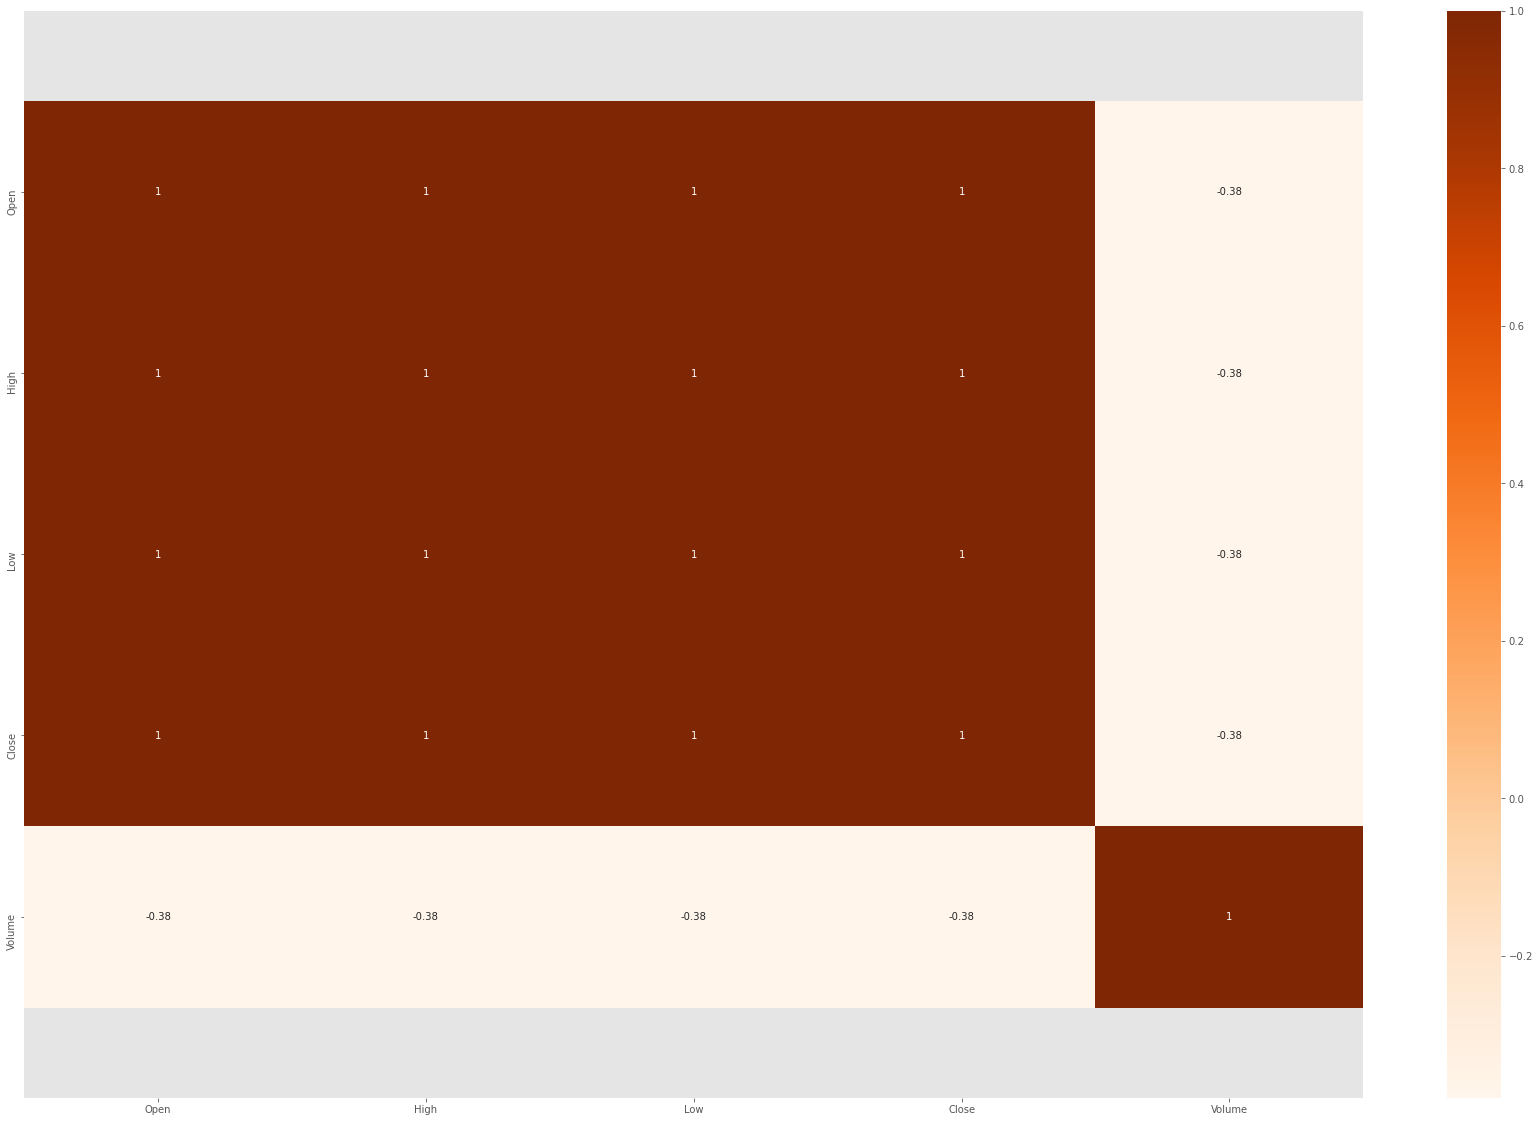

In [197]:
features = ['Open','High','Low','Close','Volume']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df[features].corr(),cmap='Oranges',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

# lasso model

In [198]:
X, X_test, y, y_test = train_test_split(df[['Open','High','Low','Close']], 
                                        df['Volume'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [199]:
# Fit a simple linear regression on training set
df = LinearRegression()
df.fit(X_train,y_train)
df.score(X_train,y_train)

0.22296898098036477

In [200]:
# Score on validation set
df.score(X_val,y_val)#

0.24074262260280688

In [201]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

X_val_poly = poly.transform(X_val)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.4137323693811835

In [202]:
lr_poly.score(X_val_poly, y_val)

0.4225649648915065

In [203]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [204]:
lr_poly.coef_#

array([        0.        ,  -1706445.58444522,  39398801.09723963,
       -32084290.65829042,  -6872033.85342939,   -636528.01385376,
          386198.60120311,    370245.77991204,    521451.8054869 ,
        -1147823.47605036,   1375715.22898033,    425443.02847031,
         -587564.67909114,   -478153.66742633,   -225122.59686272])

In [205]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_val_poly_scaled = scaler.transform(X_val_poly)

lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8618098731288576.0, tolerance: 192139696704069.53
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.462509246076621e+16, tolerance: 192139696704069.53
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.148080104491763e+16, tolerance: 192139696704069.53
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.072838680097126e+16, tolerance: 197097661427346.5
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.242015555362355e+16, tolerance: 197097661427346.5
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.366312409206477e+16, tolerance: 197097661427346.5
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

C:\Users\liqui\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.753721405933606e+17, tolerance: 235602532425567.75
  model = cd_fast.enet_coordinate_descent(


0.2498080299818406

In [206]:
lasso.score(X_val_poly_scaled, y_val)

0.282321889195843

In [207]:
list(zip(poly.get_feature_names(['Open','High','Low','Close','Volume']),lasso.coef_))


[('1', 0.0),
 ('Open', -3529428.2016788316),
 ('High', 44805906.607996166),
 ('Low', -119420276.32081209),
 ('Close', 34089117.94581538),
 ('Open^2', 48453133.496013604),
 ('Open High', 27390561.49133398),
 ('Open Low', -33102113.188246522),
 ('Open Close', 0.0),
 ('High^2', 61244637.76765118),
 ('High Low', -34013388.88652887),
 ('High Close', 0.0),
 ('Low^2', -54756560.18727793),
 ('Low Close', 0.0),
 ('Close^2', 18714273.495758563)]

# Standardization

In [208]:
scaler = RobustScaler() #RobustScaler - StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
# Standardization
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (2537, 4)
Shape of the y Train : (2537,)
Shape of the X test : (846, 4)
Shape of the y test : (846,)


# Polynomial

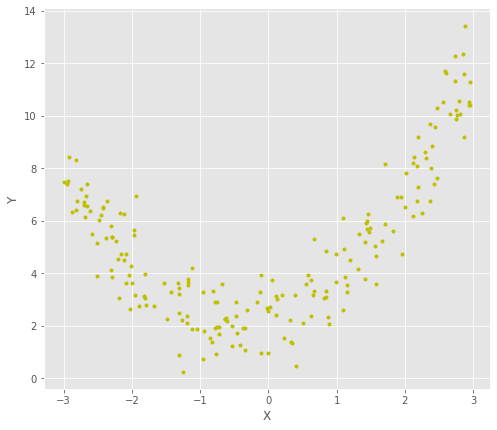

In [210]:
# Create & Visualize Data

X = 6 * np.random.rand(200, 1) - 3
y = 0.9 * X**2 + 0.7*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'y.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()#Polynomial

In [211]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [212]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.255674281087958


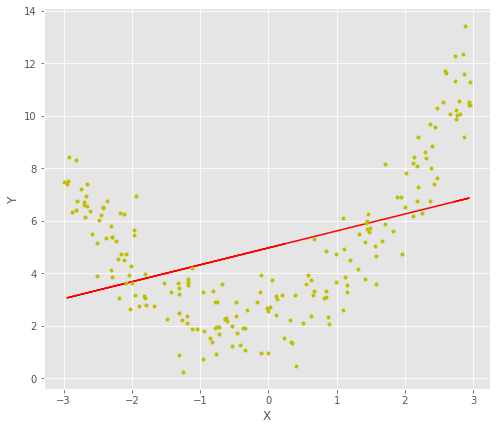

In [213]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "y.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [214]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9079631737710904


In [215]:
print(lr.coef_)
print(lr.intercept_)

[[0.70440413 0.84066117]]
[2.31660332]


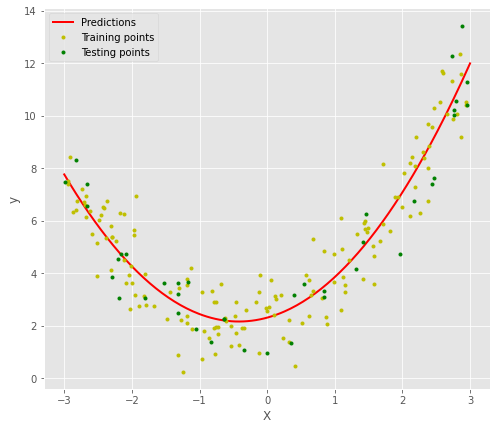

[[0.70440413 0.84066117]]
[2.31660332]


In [216]:
# applying polynomial regression degree 2
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "y.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
print(lr.coef_)
print (lr.intercept_)

# MSFT Moving Average

In [217]:
import pandas_datareader.data as web
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2021, 1, 1)
df = web.DataReader("MSFT", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,223.610001,221.199997,221.419998,222.750000,10550600.0,221.302490
2020-12-28,226.029999,223.020004,224.449997,224.960007,17933500.0,223.498138
2020-12-29,227.179993,223.580002,226.309998,224.149994,17403200.0,222.693390
2020-12-30,225.630005,221.470001,225.229996,221.679993,20272300.0,220.239426
2020-12-31,223.000000,219.679993,221.699997,222.419998,20942100.0,220.974640


In [218]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

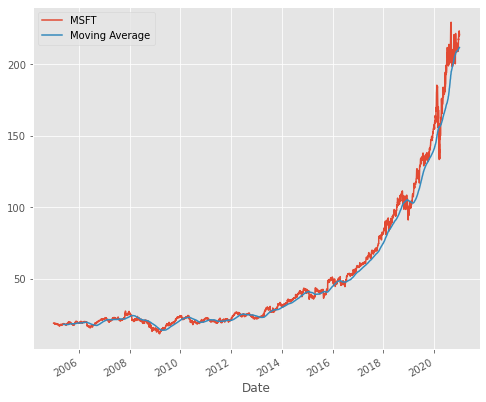

In [219]:
# Adjusting the size of matplotlib
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='MSFT')
mavg.plot(label='Moving Average')
plt.legend()